# Glass Identification Data set

## 1) What the data is about?

The dataset for glass identification is a classification dataset.The research of glass classification was prompted by a criminological examination.If the glass left at the crime scene is accurately identified,it can be used as evidence.This data set includes attributes for a variety of glass kinds (multi-class). Because class 6 is clearly a minority group,its points are labelled as outliers, while all other points are labelled as inliers.

### Attribute Information

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)

1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

## 2) What type of benefit you might hope to get from data mining?

Following are the benefits of data mining--

1. It assists businesses in gathering accurate data.
2. In comparison to other data applications, it's a time- and money-saving solution.
3. It aids organisations in making cost-effective production and operational changes.
4. Data mining makes use of both new and old systems.
5. It assists firms in making well-informed decisions.
6. It aids in the detection of credit risks and fraud.
7. It allows data scientists to quickly evaluate large amounts of data.
8. The information can be used by data scientists to detect fraud, create risk models, and improve product safety.

## 3) Discuss data quality issues: For each attribute,
##    a) Are there problems with the data?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn import datasets


In [2]:
#Reading the CSV file and storing it in the data frame object named df

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",names=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','class'])

## Data Exploration

### Motivation:

Data exploration refers to the preliminary investigation of data in order to better understand its specific characteristics. There are two key motivations for data exploration:

1. To help users select the appropriate preprocessing and data analysis technique used.
2. To make use of humans’ abilities to recognize patterns in the data.

In [3]:
df.head()     # Displaying first few rowsof the data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape    # Number of rows(instances), Number of Attributes

(214, 10)

In [5]:
df.info()       #Basic information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   class   214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


## Hence there are no null objects

In [6]:
df['class'].value_counts()  #count the frequency for each of its distinct values

2    76
1    70
7    29
3    17
5    13
6     9
Name: class, dtype: int64

In [7]:
df.describe() 
#display the summary for all the attributes 
#If an attribute is quantitative, it will display its mean, standard deviation and various quantiles values. 
#If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values.

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
## checking for missing values in the data set
df.isnull().sum()

RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
class    0
dtype: int64

## Hence, there are no missing values in our Glass identification data set

In [9]:
df.cov()                    #Covariance

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
RI,9.222541e-06,-0.000476,-0.000536,-0.000618,-0.001275,-0.000574,0.003502,-5.828836e-07,0.000042,-0.001049
Na,-4.758592e-04,0.666841,-0.322422,0.063926,-0.044154,-0.141713,-0.320106,1.326109e-01,-0.019204,0.863939
Mg,-5.356087e-04,-0.322422,2.080540,-0.346967,-0.185375,0.005076,-0.910916,-3.530469e-01,0.011674,-2.260643
Al,-6.175934e-04,0.063926,-0.346967,0.249270,-0.002136,0.106138,-0.184450,1.190103e-01,-0.003620,0.628970
Si,-1.275010e-03,-0.044154,-0.185375,-0.002136,0.599921,-0.097662,-0.230085,-3.934042e-02,-0.007109,0.246967
K,-5.740478e-04,-0.141713,0.005076,0.106138,-0.097662,0.425354,-0.295006,-1.382028e-02,-0.000491,-0.013795
Ca,3.502498e-03,-0.320106,-0.910916,-0.184450,-0.230085,-0.295006,2.025366,-7.984845e-02,0.017329,0.002851
Ba,-5.828836e-07,0.132611,-0.353047,0.119010,-0.039340,-0.013820,-0.079848,2.472270e-01,-0.002844,0.601630
Fe,4.231770e-05,-0.019204,0.011674,-0.003620,-0.007109,-0.000491,0.017329,-2.843522e-03,0.009494,-0.038594
class,-1.049273e-03,0.863939,-2.260643,0.628970,0.246967,-0.013795,0.002851,6.016300e-01,-0.038594,4.425716


In [10]:
df.corr(method='pearson')       #Correlation

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
class,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [11]:
#Handling
del df['Fe']
del df['Ba']

### Deleteing two columns as their values are too low and our model will become more sophisticated and complex

### We will build our model based on attributes in the columns 2-8 

In [12]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,class
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1


## Data Visualization

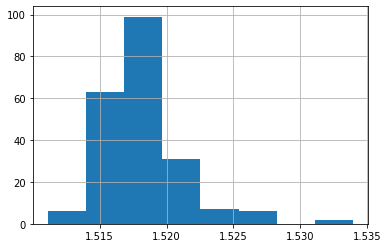

In [13]:
get_ipython().run_line_magic('matplotlib', 'inline')

df['RI'].hist(bins=8)  

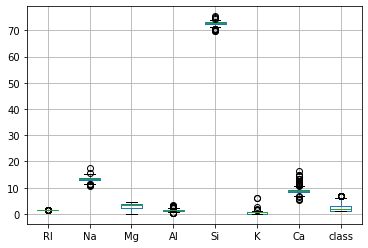

In [14]:
df.boxplot()         

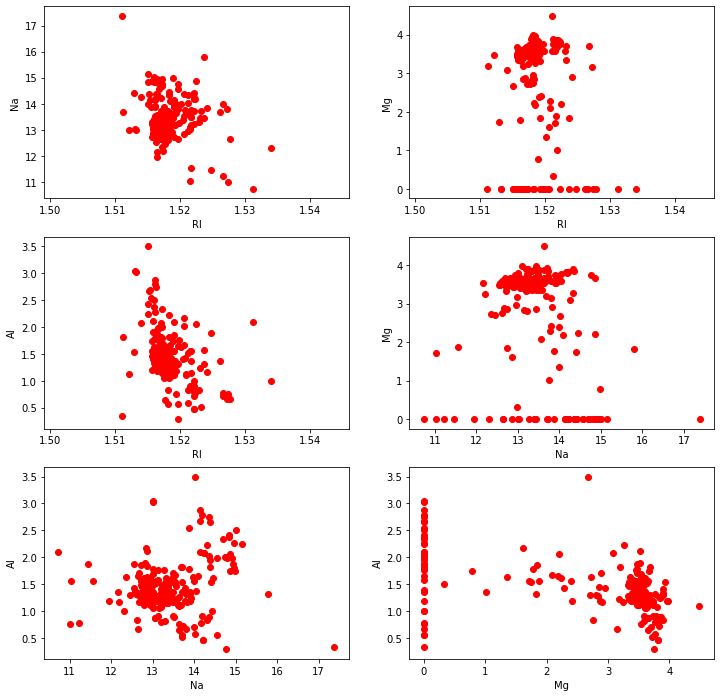

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))   # dimenensions of picture below? - 7 attributes
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(df[df.columns[i]], df[df.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(df.columns[i])
        axes[ax1][ax2].set_ylabel(df.columns[j])
        index = index + 1

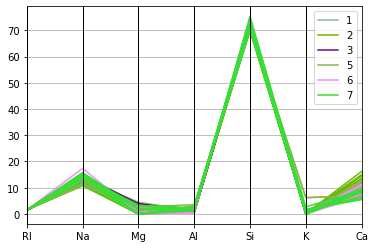

In [16]:
from pandas.plotting import parallel_coordinates
get_ipython().run_line_magic('matplotlib', 'inline')

parallel_coordinates(df, 'class')

## Heatmap

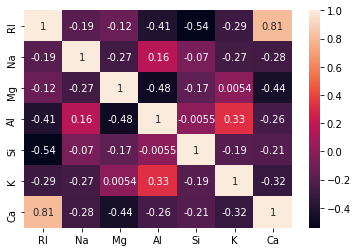

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(method='pearson').drop(
  ['class'], axis=1).drop(['class'], axis=0),
            annot = True);
  
plt.show()

## Boxplot

### We will detect the outliers using IQR and then we will remove them. We will also draw the boxplot to see if the outliers are removed or not.

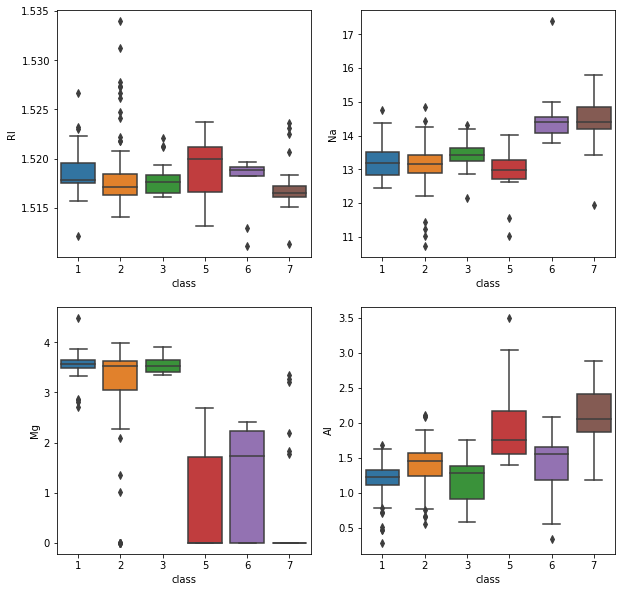

In [18]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

def graph(y):
	sns.boxplot(x="class", y=y, data=df)

plt.figure(figsize=(10,10))
	
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('RI')

plt.subplot(222)
graph('Na')

plt.subplot(223)
graph('Mg')

plt.subplot(224)
graph('Al')

plt.show()

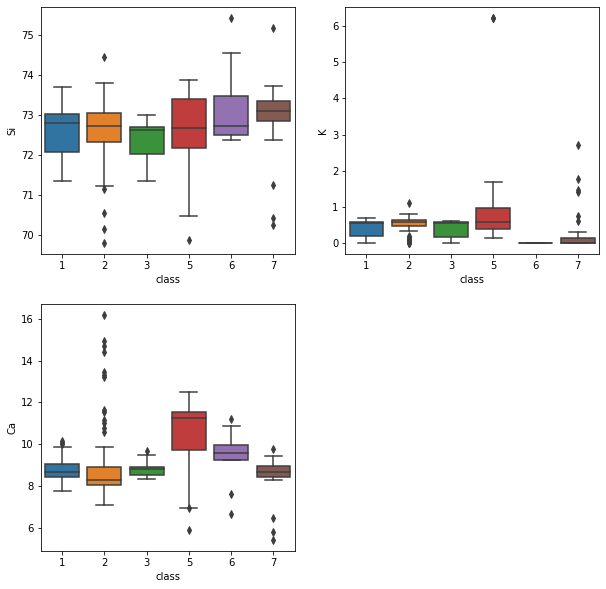

In [19]:
def graph(y):
	sns.boxplot(x="class", y=y, data=df)

plt.figure(figsize=(10,10))
	
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('Si')

plt.subplot(222)
graph('K')

plt.subplot(223)
graph('Ca')

plt.show()

### We will not remove ouliers in this case because these are not the actual outliers as our dataset is too small and when we try to remove the outlier then they again show up


Importing

import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns


IQR

Q1 = np.percentile(df['K'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['K'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

Upper bound

upper = np.where(df['K'] >= (Q3+1.5*IQR))

Lower bound

lower = np.where(df['K'] <= (Q1-1.5*IQR))

Removing the Outliers

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='K', data=df)


## USING above code we can remove outliers but we not using it because of the mentioned reason

In [20]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,class
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1


In [22]:
df.shape

(214, 8)

In [21]:
df['class'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: class, dtype: int64

## Hence 6 classes are found , we see that 4th class is missing

### Next we will make models for next part of question